In [1]:
import numpy as np 
import pandas as pd 
import re
#Tesseract Library
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
def ExtractDetails(image_path):
    text = pytesseract.image_to_string(Image.open(image_path), lang = 'eng')
    text = text.replace("\n", " ")
    pan_DOB = re.compile('\d{2}[-/]\d{2}[-/]\d{4}')
    pan_num = re.compile('[A-Z]{5}[0-9]{4}[A-Z]{1}')
    pan_name = re.compile('[A-Z]{6} [A-Z]{7} [A-Z]{6}')
    pan_father_name = re.compile('[a-zA-Z]{1,7} [a-zA-Z]{1,6}')
    
    image = cv2.imread(os.path.join(image_path))
    plt.imshow(image)
    plt.axis("off")  
    
    
    if len(pan_num.findall(text)) == 0:
        print('Blurry Image for tesseract. Input new clear image for viewing pan card number !!!')
    else:
        print("Pan Card Number : ", pan_num.findall(text)[0])    
    print('=================================')
    
    
    
    if len(pan_DOB.findall(text)) == 0:
        print('Blurry Image for tesseract. Input new clear image for viewing DATE OF BIRTH !!!')
    else:
        print("DATE OF BIRTH :   ", pan_DOB.findall(text)[0]) 
    print('=================================')
    
    
    
    if len(pan_name.findall(text)) == 0:
        print('Blurry Image for tesseract. Input new clear image for viewing NAME !!!')
    else:
        print("NAME :   ", pan_name.findall(text)[0])
    print('=================================')
    
    
    
    if len(pan_father_name.findall(text)) == 0:
        print('Blurry Image for tesseract. Input new clear image for viewing FATHER_NAME !!!')
    else:
        print(text[0])
        print("FATHER'S NAME :   ", pan_father_name.findall(text)[0])
    print('=================================')    

### Testing on random images from the Internet

Pan Card Number :  EJAPS0276M
DATE OF BIRTH :    31/10/1992
NAME :    MONIKA MAHADEV SHINDE
I
FATHER'S NAME :    INCOME TAX


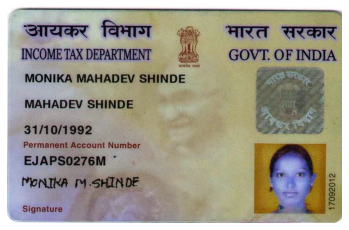

In [3]:
ExtractDetails('downloaded_pan2.jpg')